<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/deep_learning_hydroponics_and_medical_marijuana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep learning, hydroponics, and medical marijuana

Train a Convolutional Neural Network (CNN) using Keras to automatically classify root health without having to physically touch the plants.

The actual experiment design of this tutorial is motivated by Darrah et al. in their 2017 paper, Real- time Root Monitoring of Hydroponic Crop Plants: Proof of Concept for a New Image Analysis System.

Such a system can improve the yields of existing hydroponic farms making farms more efficient and sustainable to run. Of course, the successful application of hydroponics has massive implications for the medical marijuana industry.




# Problem Statement
The overall goal of the project was to develop an automated root growth analysis system capable of accurately measuring the roots followed by detecting any growth problems:

# Our dataset of 1,524 root images includes:

* Hairy: 748 images (left)

* Non-hairy: 776 images (right)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
!unzip "/content/drive/My Drive/PyimageSearch/dl-medical-marijuana.zip"

Archive:  /content/drive/My Drive/PyimageSearch/dl-medical-marijuana.zip
   creating: dl-medical-marijuana/
   creating: dl-medical-marijuana/dataset/
   creating: dl-medical-marijuana/dataset/hairy_root/
  inflating: dl-medical-marijuana/dataset/hairy_root/100_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/101_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/102_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/103_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/104_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/105_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/106_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/107_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/108_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/109_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/10_a.jpg  
  inflating: dl-medical-marijuana/dataset/hairy_root/110_a.jpg  
  inflating: dl-

In [7]:
import warnings
warnings.filterwarnings('ignore')

# Load and transform data

In [12]:
path = "/content/dl-medical-marijuana/dataset"
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.1,ds_tfms=get_transforms(),size=224,bs=8).normalize(imagenet_stats)

# Data Stats

In [13]:
data

ImageDataBunch;

Train: LabelList (1372 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
non_hairy_root,non_hairy_root,non_hairy_root,non_hairy_root,non_hairy_root
Path: /content/dl-medical-marijuana/dataset;

Valid: LabelList (152 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hairy_root,non_hairy_root,non_hairy_root,non_hairy_root,non_hairy_root
Path: /content/dl-medical-marijuana/dataset;

Test: None

## Data Labels

In [14]:
print(f'Data Labels : {data.classes}')

Data Labels : ['hairy_root', 'non_hairy_root']


Visualize the data

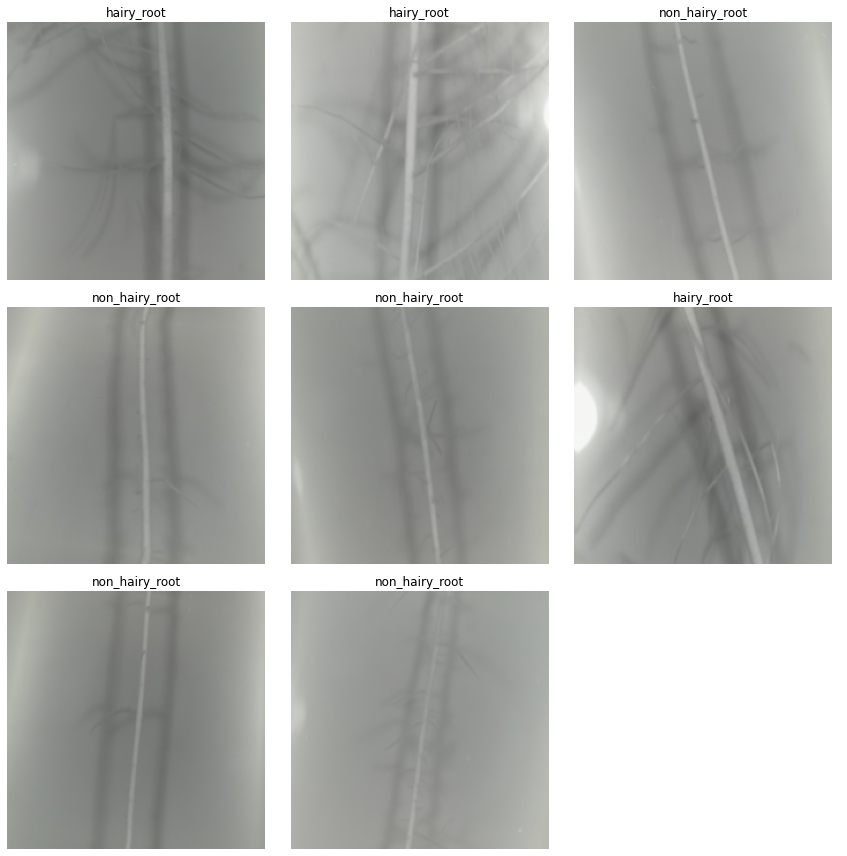

In [15]:
data.show_batch(rows=3,figsize=(12,12))

# Build Models

In [16]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


# Train Model

Run the data through all 34 layers of the CNN model 5 times, only parameters corresponding to trainable layers are updated

In [17]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.219837,0.092819,0.019737,00:21
1,0.206926,0.064798,0.026316,00:20
2,0.155630,0.051362,0.013158,00:20
3,0.161517,0.029818,0.013158,00:20
4,0.101071,0.029613,0.006579,00:20


# Interpret the classification results

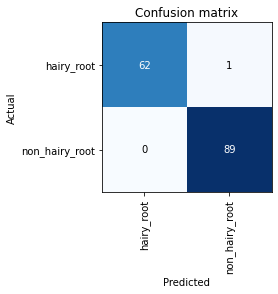

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

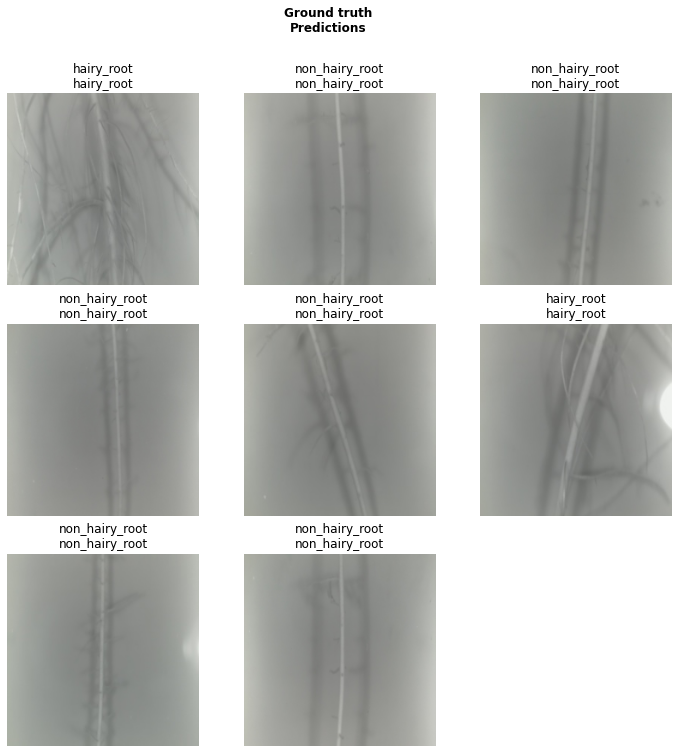

In [25]:
learn.show_results()

# Unfreeze

All weigts from frozen layers of the model can get updated from their pretrained state

freezing prevents the weights of a neural network layer from being updated during backward propagation.

In [26]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.242399,0.015430,0.006579,00:28
1,0.290311,0.042002,0.013158,00:27
2,0.137197,0.008771,0.000000,00:27
3,0.150032,0.051612,0.006579,00:27
4,0.019034,0.014535,0.000000,00:27


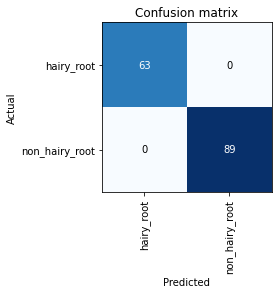

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

The accuracy as improved by unfreezing the layers and allowing all weights to be updated.

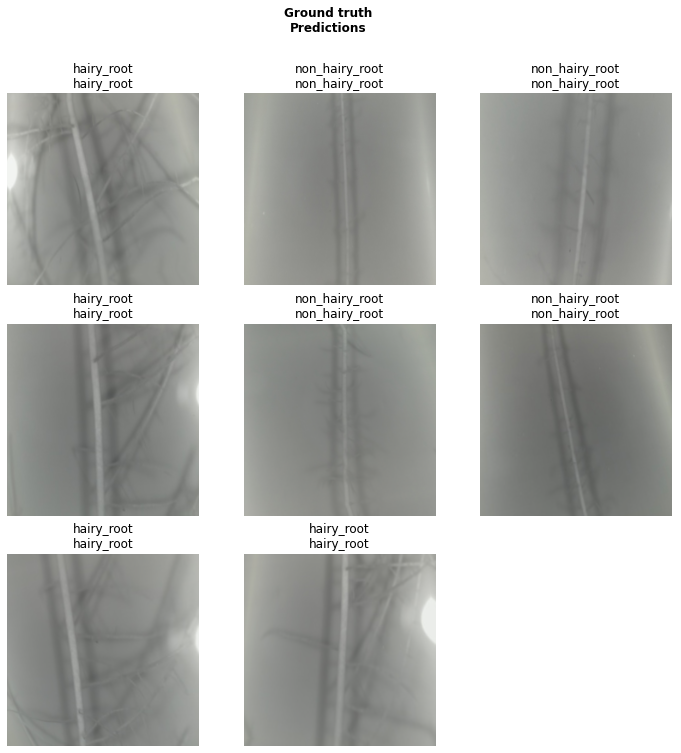

In [35]:
#Display Predictions On Training Data
learn.show_results(ds_type=DatasetType.Train,rows = 5)

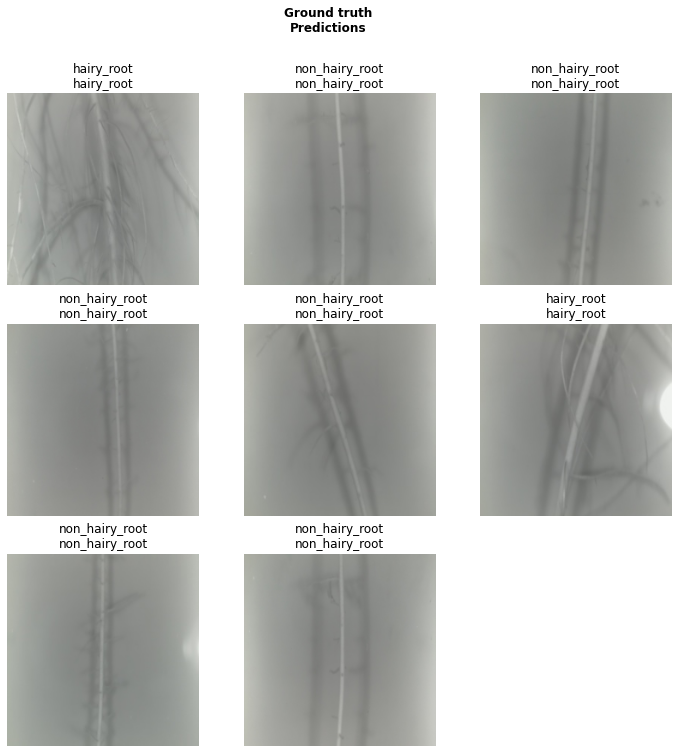

In [36]:
#Display Predictions On Validation Data
learn.show_results(ds_type=DatasetType.Valid,rows = 5)

# Validation Accuracy

In [31]:
preds,y = learn.get_preds(DatasetType.Valid)
print(f'Validation Acuracy : {accuracy(preds,y) * 100}%')

Validation Acuracy : 100.0%


#Getting The Training And Validation Errors


In [37]:
tr = learn.validate(learn.data.train_dl)
va = learn.validate(learn.data.valid_dl)

In [45]:
print(f'Training error :{tr[1]}')

Training error :0.002923976629972458


In [44]:
print(f'validation error :{va[1]}')

validation error :0.0


In [39]:
print("The Metrics used In Evaluating The Network:", str(learn.metrics))

The Metrics used In Evaluating The Network: [<function error_rate at 0x7f10ca199ea0>]


In [34]:
learn.recorder.plot_metrics

<bound method Recorder.plot_metrics of Recorder
learn: Learner(data=ImageDataBunch;

Train: LabelList (1372 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
non_hairy_root,non_hairy_root,non_hairy_root,non_hairy_root,non_hairy_root
Path: /content/dl-medical-marijuana/dataset;

Valid: LabelList (152 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
hairy_root,non_hairy_root,non_hairy_root,non_hairy_root,non_hairy_root
Path: /content/dl-medical-marijuana/dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
   

# Deep learning, hydroponics, and medical marijuana using Keras